### Исследование ассортимента растительного и коровьего молока в интернет-магазине "Перекресток"

## Описание проекта

Веганы часто ищут выгодные предложения для покупки расительных альтернатив привычным продуктам. Заменитель молока и мяса, пожалуй, входят в самые популярные категории. 

Рассмотрим категорию молоко и растительное молоко объемом 1 литр в интернет-магазине Перектесток. Исследуем ассортимент и цены. 

**Цель:** Понять что выгоднее, покупать коровье молоко или выбирать альтернативные растительные напитки для замены. 

Для данного исследования мы используем датасеты, полученные с помощью парсинга.

Описание данных:

- `name` - наименование, производитель, жирность и объем продукта
- `price` - цена за 1 шт

Для того, чтобы сделать вывод нам необходимо исследовать:

- сколько позиций представлено
- диапазон цен (минимальная, максимальная, медианная цена)
- наиболее часто встречающиеся цены и марки
- наиболее популярные и наименее популярные виды растительного молока

## Шаг 1. Откройте файл с данными и изучите общую информацию
<a id='info'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymystem3 import Mystem
from collections import Counter

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', None)
pd.set_option("max_colwidth", 200)

In [2]:
#открываем файл, который мы спарсили с сайта перекрестка из раздела "Здоровье"

products_health = pd.read_csv('products_64.csv')
products_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      927 non-null    object 
 1   price     927 non-null    float64
 2   exists    927 non-null    object 
 3   category  927 non-null    object 
 4   quantity  927 non-null    object 
dtypes: float64(1), object(4)
memory usage: 36.3+ KB


In [3]:
# посмотрим первые 5 строк

products_health.head()

,name,price,exists,category,quantity
0,"Печенье Зелёная Линия Воздушные колечки заварное, 100г",49.99,В наличии много,Здоровье,шт
1,"Батончик глазированный Snaq Fabriq арахис карамель, 50г",69.99,В наличии много,Здоровье,шт
2,"Напиток овсяный Nemoloko шоколадный 3.2%, 1л",129.99,В наличии много,Здоровье,шт
3,"Лапша Imperial Cuisine гречневая соба без пучков, 400г",39.99,В наличии много,Здоровье,шт
4,"Мука Garnec рисовая без глютена, 500г",59.99,В наличии много,Здоровье,шт


In [4]:
#открываем файл, который мы спарсили с сайта перекрестка из раздела "Молоко"

products_milk = pd.read_csv('products_114.csv')
products_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      499 non-null    object 
 1   price     499 non-null    float64
 2   exists    499 non-null    object 
 3   category  499 non-null    object 
 4   quantity  499 non-null    object 
dtypes: float64(1), object(4)
memory usage: 19.6+ KB


In [5]:
products_milk.head()

,name,price,exists,category,quantity
0,"Молоко ультрапастеризованное Домик в деревне 3.2%, 925мл",79.99,В наличии много,Молоко,шт
1,"Молоко пастеризованное Домик в деревне 2.5%, 930мл",69.99,В наличии много,Молоко,шт
2,"Молоко ультрапастеризованное Домик в деревне 2.5%, 950мл",76.99,В наличии много,Молоко,шт
3,"Молоко пастеризованное Домик в деревне 3.7%, 930мл",89.99,В наличии много,Молоко,шт
4,"Молоко пастеризованное Домик в деревне 3.7%, 1.4л",119.99,В наличии много,Молоко,шт


- Открыли файл, который спарсили с сайта Перекрестка из раздела "Здоровье"
- Всего 927 не пустых строк формата object, float64
- Открыли файл, который спарсили с сайта Перекрестка из раздела "Молоко"
- Всего 499 не пустых строк формата object, float64

## Шаг 2. Предобработка данных
<a id='preprocessing'></a>

Для дальнейшего анализа необходимо оставить в наших датасетах только растительные напитки и молоко объемом 1л.

In [6]:
# оставим только молоко объемом 1 л

plant_milk = products_health[(products_health['name'].str.contains('Напиток'))& \
                             (products_health['name'].str.contains('1л'))
                            ][['name', 'price']].sort_values(by='price')

#переведем в нижний регистр

plant_milk['name'] = plant_milk['name'].str.lower()
plant_milk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 754 to 467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    56 non-null     object 
 1   price   56 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [7]:
plant_milk

,name,price
754,"напиток оздоровительный витан спорт натуральный, 1л",104.99
264,"напиток овсяный здоровое меню 1%, 1л",109.99
275,"напиток рисовый здоровое меню 1%, 1л",109.99
229,"напиток соевый здоровое меню 2%, 1л",109.99
423,"напиток овсяный овсяша обогащённый 1.5%, 1л",109.99
60,"напиток зелёная линия овсяный ванильный на растительной основе, 1л",119.99
86,"напиток зелёная линия овсяный классический на растительной основе, 1л",119.99
5,"напиток овсяный nemoloko классический 3.2%, 1л",124.99
29,"напиток овсяный nemoloko классический лайт 1.5%, 1л",124.99
2,"напиток овсяный nemoloko шоколадный 3.2%, 1л",129.99


In [8]:
len(plant_milk['name'].unique())

56

После фильтрации осталось 56 уникальных наименований, но "напиток оздоровительный витан спорт натуральный, 1л" явно не входит в группу растительного молока. И таких может быть множество, создадим универсальную конструкцию для отсева лишних строк.

In [9]:
# сфомируем список марок, которые не относятся к растительному молоку 
# в нашем случае только 1

list_minus_name = ['витан']


# отфильтруем наименования, цены на все напитки объемом 1л, за исключением тех, 
# что вошли в список 

plant_milk = plant_milk[~(plant_milk['name'].str.contains('|'.join(list_minus_name)))]
plant_milk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 264 to 467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    55 non-null     object 
 1   price   55 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


Итого 55 подходящих позиций.

In [10]:
# оставим только молоко объемом 1 л

milk = products_milk[(products_milk['name'].str.contains('Молоко'))& \
                     (products_milk['name'].str.contains('1л'))
                    ][['name', 'price']].sort_values(by='price')

#переведем в нижний регистр

milk['name'] = milk['name'].str.lower()
milk

,name,price
192,"молоко нежеголь пастеризованное 2.5%, 1л",41.99
207,"молоко молком российское 2.5%, 1л",43.20
91,"молоко маслозавод нытвенский нытвенское питьевое пастеризованное 2.5%, 1л",51.99
120,"молоко агрофирма труд пастеризованное 2.5%, 1л",52.90
160,"молоко суджанский маслодельный комбинат пастеризованное 2.5%, 1л",54.90
73,"молоко томмолоко российское пастеризованное 2.5%, 1л",55.99
208,"молоко заонежное питьевое пастеризованное 2.5%, 1л",57.99
30,"молоко ирбитское классическое пастеризованное 3.2%, 1л",63.99
212,"молоко вятушка 3.5%, 1л",63.99
223,"молоко кировский 2.7%, 1л",63.99


In [11]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 192 to 153
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    73 non-null     object 
 1   price   73 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Обработли сырые датасеты, оставив только интересующие позиции:
- 55 позиций растительного молока,
- 73 позиции коровьего молока.

## Шаг 3. EDA
<a id='eda'></a>

In [12]:
# воспользуемся методом describe, для того, чтобы посмотреть среднюю и медианные цены

plant_milk.describe()

,price
count,55.00
mean,211.21
std,70.82
min,109.99
25%,144.99
50%,229.99
75%,269.94
max,339.99


In [13]:
milk.describe()

,price
count,73.00
mean,91.78
std,28.62
min,41.99
25%,69.99
50%,87.90
75%,109.99
max,184.99


Цены на:

- **растительное молоко** варируются в диапазоне от 109.99р. до 339.99р. за 1 литр. 

медианная цена 229.99 р.


- **коровье молоко** варьируются от 41.99р. до 184.99р. за 1 литр.

медианная цена 87.90 р.

Быть Веганом, делающим покупки в Перекрестке обходится в 2,5 раза дороже.

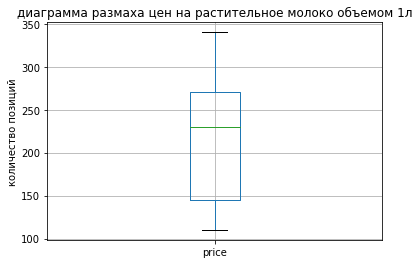

In [14]:
#построим диаграмму размаха 

plant_milk.boxplot()

plt.ylabel('количество позиций')
plt.title('диаграмма размаха цен на растительное молоко объемом 1л')

plt.show()

По диаграмме размаха видно, что медиана скошена вправо. Основной диапазон цен стремится в бОльшую сторону от средней.

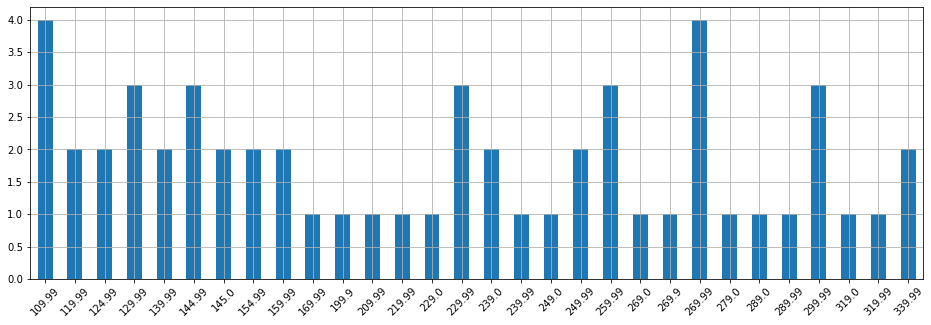

In [15]:
plant_milk['price'].value_counts() \
                   .sort_index() \
                   .plot(y ='price', kind='bar', grid=True, figsize=(16, 5))

plt.xticks(rotation=45)
plt.show()

Больше всего позиций с ценой: 
- 109.99
- 259.99

In [16]:
plant_milk.query('price == 109.99')

,name,price
264,"напиток овсяный здоровое меню 1%, 1л",109.99
275,"напиток рисовый здоровое меню 1%, 1л",109.99
229,"напиток соевый здоровое меню 2%, 1л",109.99
423,"напиток овсяный овсяша обогащённый 1.5%, 1л",109.99


По цене 109.99 представлены марки "Овсяша" и "Здоровое меню".

In [17]:
plant_milk.query('price == 259.99')

,name,price
773,"напиток соевый alpro soya ванильный, 1л",259.99
295,"напиток соевый alpro без сахара обогащённый кальцием 1.8%, 1л",259.99
311,"напиток соевый alpro soya bio обогащённый кальцием без глютена 1.8%, 1л",259.99


По цене 259.99 представлены марки 
- "Alpro"
- "Kalleh"

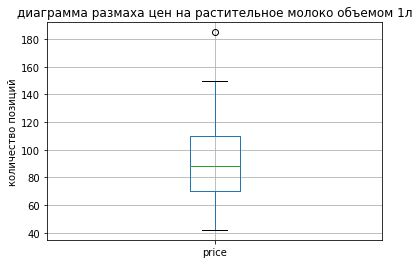

In [18]:
#построим диаграмму размаха 

milk.boxplot()

plt.ylabel('количество позиций')
plt.title('диаграмма размаха цен на растительное молоко объемом 1л')

plt.show()

По диаграмме размаха видно, что медиана скошена влево. Основной диапазон цен стремится в меньшую сторону от средней.

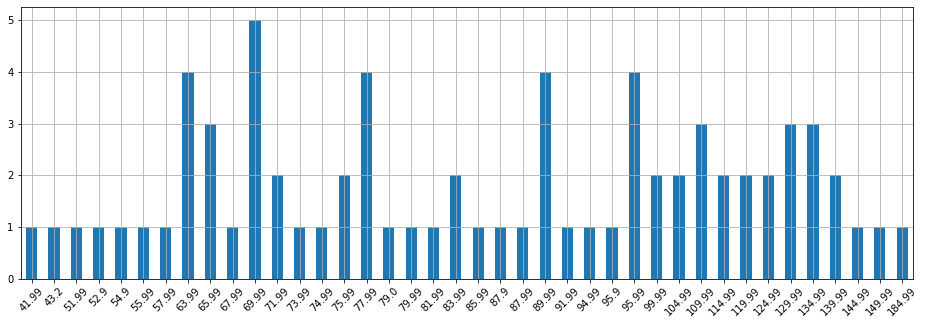

In [19]:
milk['price'].value_counts() \
             .sort_index() \
             .plot(y ='price', kind='bar', grid=True, figsize=(16, 5))

plt.xticks(rotation=45)
plt.show()

Больше всего позиций с ценой: 
- 69.99 

In [20]:
milk.query('price == 69.99')

,name,price
489,"молоко первый вкус питьевое пастеризованное 2.5%, 1л",69.99
252,"молоко ашатли деревенское 3.4-4.5%, 1л",69.99
239,"молоко молочная благодать классическое 3.2%, 1л",69.99
478,"молоко халяль цельное стерилизованное 3.4-5.5%, 1л",69.99
384,"молоко русское молоко ультрапастеризованное гост 3.2%, 1л",69.99


По цене 69.99 представлены марки:

- "первый вкус", 
- "ашатли", 
- "молочная благодать", 
- "халяль", 
- "русское молоко".

Проанализируем какого вида молока больше всего. 

Для этого используем 2 метода:

1. Через заранее определенный лист (P.S. придется выписывать виды вручную)

In [21]:
# создадим лист с ключами
list_of_type = ['рис', 'соевый', 'овсян', \
                'миндаль', 'гречневый', 'кокос', \
                'ореховый', 'грецкий орех', \
                'фундук', 'пшеничный']

# создадим 
type_of_milk = {}
for i in list_of_type:
    type_of_milk[i] = plant_milk[plant_milk['name'].str.contains(i)]['name'].count()

new_list = sorted(type_of_milk.items(), key=lambda x: x[1], reverse=True)
for i in new_list:
    print(i[0], i[1])

овсян 16
соевый 12
кокос 10
миндаль 9
рис 4
ореховый 4
фундук 2
гречневый 1
грецкий орех 1
пшеничный 1


2. Через библиотеки Mystem, Counter. Быстрый, но менее наглядный.

In [22]:
m = Mystem()
text = ' '.join(plant_milk['name'].unique())
lemmas = m.lemmatize(text)
Counter(lemmas).most_common()

[(' ', 387),
 ('напиток', 55),
 ('1л', 54),
 (', ', 36),
 ('обогащать', 19),
 ('%, ', 18),
 ('alpro', 17),
 ('овсяный', 16),
 ('кальций', 14),
 ('соевый', 12),
 ('с', 12),
 ('ультрапастеризовать', 12),
 ('растительный', 10),
 ('take', 9),
 ('a', 9),
 ('bite', 9),
 ('классический', 8),
 ('nemoloko', 8),
 ('миндальный', 8),
 ('на', 7),
 ('основа', 7),
 ('1.8', 7),
 ('кокосовый', 7),
 ('и', 6),
 ('витамин', 6),
 ('пастеризовать', 5),
 ('здоровый', 4),
 ('меню', 4),
 ('1.5', 4),
 ('ореховый', 4),
 ('без', 4),
 ('soya', 4),
 ('1', 3),
 ('овсяш', 3),
 ('зеленый', 3),
 ('линия', 3),
 ('hi', 3),
 ('кокос', 3),
 ('кешью', 3),
 ('&', 3),
 ('velle', 3),
 ('глютен', 3),
 ('coconut', 3),
 ('almond', 3),
 ('barista', 3),
 ('соя', 3),
 ('рисовый', 2),
 ('ванильный', 2),
 ('3.2', 2),
 ('лайт', 2),
 ('орех', 2),
 ('миндаль', 2),
 ('детский', 2),
 ('свитлогорье', 2),
 ('банановый', 2),
 ('рис', 2),
 ('no', 2),
 ('sugars', 2),
 ('фундук', 2),
 ('for', 2),
 ('professionals', 2),
 ('2', 1),
 ('шоколадный',

Топ 3:
- овсяное,
- соевое
- кокосовое и миндальное.

Наименее популярные виды:
- гречишный,
- макадамия,
- грецкий орех.

## Выводы

После обработки датасетов осталось уникальных:

- 55 позиций растительного молока,
- 73 позиции коровьего молока.


Цены на:

- **растительное молоко** варируются в диапазоне от 109.99р. до 339.99р. за 1 литр. 

медианная цена 229.99 р. Основной диапазон цен стремится в бОльшую сторону от средней.


- **коровье молоко** варьируются от 41.99р. до 184.99р. за 1 литр.

медианная цена 87.90 р. Основной диапазон цен стремится в меньшую сторону от средней.

**Растительное молоко**

Больше всего позиций с ценой: 
- 109.99 (марки "Здоровое меню" и "Овсяша")
- 259.99 (марки "Alpro" и "Kalleh)

Топ 3 по популярности:
- овсяное,
- соевое
- кокосовое и миндальное.

Наименее популярные виды:
- гречишный,
- макадамия,
- грецкий орех.

**Коровье молоко**

Больше всего позиций с ценой: 
- 69.99 р.

Марки:
- "первый вкус", 
- "ашатли", 
- "молочная благодать", 
- "халяль", 
- "русское молоко".

Самые доступные марки растительного молока в интернет-магазине Перекресток "Здоровое меню" и "Овсяша" по цене 109.99 р.

Самые доступные марки коровьего молока в интернет-магазине Перекресток:
"Нежеголь пастеризованное 2.5%, 1л" - 	41.99 р.
"Молком российское 2.5%" - 43.20 р.
"Маслозавод нытвенский, Нытвенское питьевое пастеризованное 2.5%, 1л" -	51.99 р.

В исследование не вошли позции объемом близким, но не равным 1 л. Многие производители уменьшили объем до 925 мл, 930 мл, 950 мл. 

Быть веганом, делающим покупки в Перекрестке обходится в 2,5 раза дороже. Даже если ориентироваться на самый низкий сегмент в обоих категориях. 